<a href="https://colab.research.google.com/github/Austin795/ML-Regression/blob/master/Abalone_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting an Abalone's Age

General Imports

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

from sklearn import preprocessing
from sklearn.model_selection import train_test_split # library used to split training and testing data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Import Abalone Data Set
#### Convert all data to numerical values, prepare our data

In [0]:
X = pd.read_csv("abalone.data",delimiter=",", names=["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"])
y = X.iloc[:,-1]
X.replace({'I': 0, 'M': 1, 'F': 2}, inplace=True) # repalce string values with integers
X = X.drop("Rings", axis=1)
#X = X.drop("", axis=1)
#X = X.drop("Sex", axis=1)
#X = X.drop("Whole weight", axis=1)
#X = X.drop("Viscera weight", axis=1)
#X = X.drop("Length", axis=1)

print(X)
print(y) 

      Sex  Length  Diameter  ...  Shucked weight  Viscera weight  Shell weight
0       1   0.455     0.365  ...          0.2245          0.1010        0.1500
1       1   0.350     0.265  ...          0.0995          0.0485        0.0700
2       2   0.530     0.420  ...          0.2565          0.1415        0.2100
3       1   0.440     0.365  ...          0.2155          0.1140        0.1550
4       0   0.330     0.255  ...          0.0895          0.0395        0.0550
...   ...     ...       ...  ...             ...             ...           ...
4172    2   0.565     0.450  ...          0.3700          0.2390        0.2490
4173    1   0.590     0.440  ...          0.4390          0.2145        0.2605
4174    1   0.600     0.475  ...          0.5255          0.2875        0.3080
4175    2   0.625     0.485  ...          0.5310          0.2610        0.2960
4176    1   0.710     0.555  ...          0.9455          0.3765        0.4950

[4177 rows x 8 columns]
0       15
1        7
2    


## Feature Scale Our Data

In [0]:
from sklearn.preprocessing import StandardScaler



csv = np.genfromtxt('abalone.data', delimiter=",")
scaler = preprocessing.MinMaxScaler()

X = scaler.fit_transform(X)
#y = scaler.fit_transform(y)

print(X, y)

[[0.5        0.51351351 0.5210084  ... 0.15030262 0.1323239  0.14798206]
 [0.5        0.37162162 0.35294118 ... 0.06624075 0.06319947 0.06826109]
 [1.         0.61486486 0.61344538 ... 0.17182246 0.18564845 0.2077728 ]
 ...
 [0.5        0.70945946 0.70588235 ... 0.3527236  0.37788018 0.30543099]
 [1.         0.74324324 0.72268908 ... 0.35642233 0.34298881 0.29347285]
 [0.5        0.85810811 0.84033613 ... 0.63517149 0.49506254 0.49177877]] 0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64


# Sklearn Method

No handles with labels found to put in legend.


Coefficients: 
 [  0.71592223  -1.00235143   7.26977584  11.80741791  24.23499291
 -28.40606717  -7.73082167   9.33223998]
Mean squared error: 4.83
Coefficient of determination: 0.57


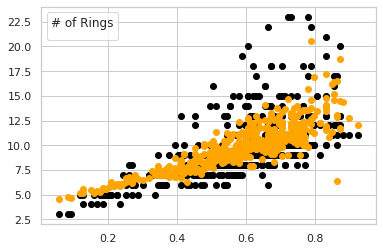

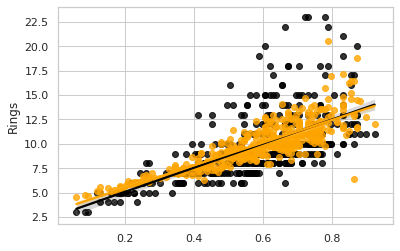

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
lreg = LinearRegression() # create LinearRegression object
lreg.fit(X_train, y_train) # fit our data

# Make predictions using the testing set
reg_pred = lreg.predict(X_test)

# The coefficients
print('Coefficients: \n', lreg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, reg_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, reg_pred))

# Plot outputs
plt.scatter(X_test[:,2], y_test, color='black')
plt.plot(X_test[:,2], reg_pred, '-o', color='orange', linewidth=0)

plt.legend(loc="upper left", title="# of Rings")
plt.grid(True)
#plt.legend()

#plt.xticks(())
#plt.yticks(())

plt.show()
seaborn.set(style="whitegrid")
seaborn.regplot(X_test[:,2], y_test, color='black')
seaborn.regplot(X_test[:,2], reg_pred ,color='orange')
